In [20]:
# imports
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# configurate general settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

In [22]:
# get the raw data directory
raw_data_dir = os.path.dirname(os.getcwd())

In [23]:
# load data
df_telemetry = pd.read_csv(os.path.join(raw_data_dir, "raw_data/PdM_telemetry.csv"))
df_errors = pd.read_csv(os.path.join(raw_data_dir, "raw_data/PdM_errors.csv"))
df_failures = pd.read_csv(os.path.join(raw_data_dir, "raw_data/PdM_failures.csv"))
df_machines = pd.read_csv(os.path.join(raw_data_dir, "raw_data/PdM_machines.csv"))
df_components = pd.read_csv(os.path.join(raw_data_dir, "raw_data/PdM_maint.csv"))

In [24]:
print("df_telemetry")
display(df_telemetry.head())
df_telemetry.info()

df_telemetry


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [25]:
print("df_errors")
display(df_errors.head())
df_errors.info()

df_errors


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [26]:
print("df_failures")
display(df_failures.head())
df_failures.info()

df_failures


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [27]:
print("df_components")
display(df_components.head())
df_components.info()

df_components


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [28]:
print("df_machines")
display(df_machines.head())
df_machines.info()

df_machines


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [29]:
# join dataframes
df_maintenance = df_telemetry.merge(df_machines, on="machineID", how="left").merge(df_components, on=["datetime", "machineID"], how="left").merge(df_errors, on=["datetime", "machineID"], how="left").merge(df_failures, on=["datetime", "machineID"], how="left")

In [30]:
df_maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877209 entries, 0 to 877208
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   877209 non-null  object 
 1   machineID  877209 non-null  int64  
 2   volt       877209 non-null  float64
 3   rotate     877209 non-null  float64
 4   pressure   877209 non-null  float64
 5   vibration  877209 non-null  float64
 6   model      877209 non-null  object 
 7   age        877209 non-null  int64  
 8   comp       2968 non-null    object 
 9   errorID    3924 non-null    object 
 10  failure    1122 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 73.6+ MB


In [31]:
# change the age column type to float
df_maintenance["age"] = df_maintenance["age"].astype(float)
# change the machineID column type to object
df_maintenance["machineID"] = df_maintenance["machineID"].astype(object)

In [32]:
# set datetime column as index
df_maintenance.set_index("datetime", inplace=True)

In [33]:
# drop useless column
df_maintenance.drop(columns="machineID", inplace=True)

In [34]:
# check for inconsistencies in the categorical features
cat_cols = df_maintenance.select_dtypes(object).columns
for c in cat_cols:
    print(f"- {c}: {df_maintenance[c].unique()}")

- model: ['model3' 'model4' 'model2' 'model1']
- comp: [nan 'comp4' 'comp1' 'comp3' 'comp2']
- errorID: [nan 'error1' 'error3' 'error5' 'error4' 'error2']
- failure: [nan 'comp4' 'comp1' 'comp2' 'comp3']


There is no inconsistencies in the categorical features.

In [35]:
for c in cat_cols:
    print(f"- {c}: {df_maintenance[c].value_counts()}")

- model: model
model3    307013
model4    280699
model2    149117
model1    140380
Name: count, dtype: int64
- comp: comp
comp2    790
comp4    735
comp1    723
comp3    720
Name: count, dtype: int64
- errorID: errorID
error1    1013
error2     988
error3     838
error4     728
error5     357
Name: count, dtype: int64
- failure: failure
comp2    386
comp1    291
comp4    255
comp3    190
Name: count, dtype: int64


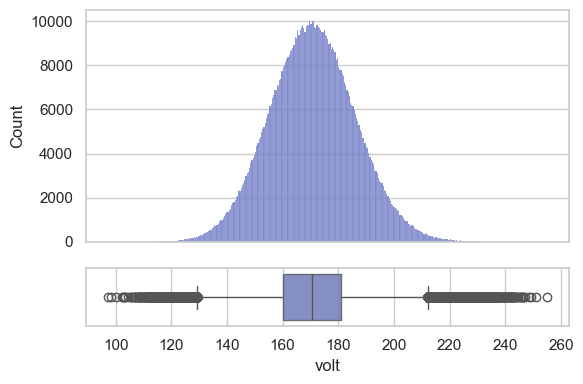

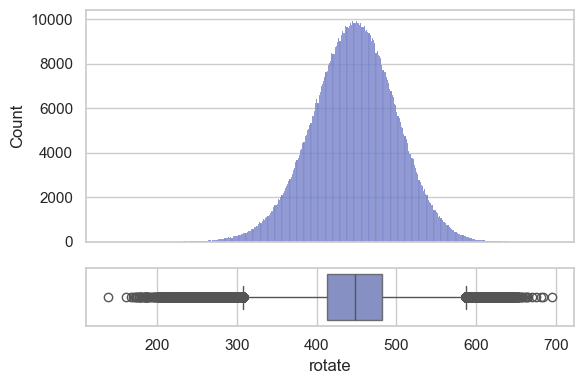

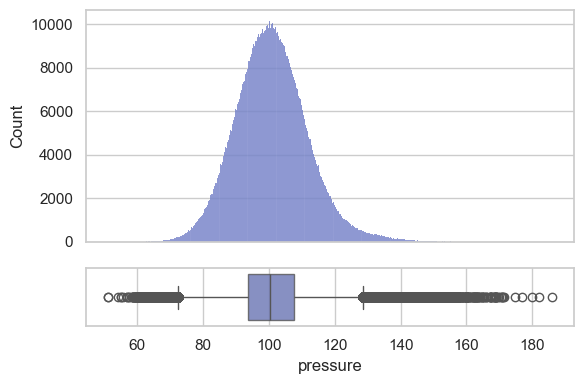

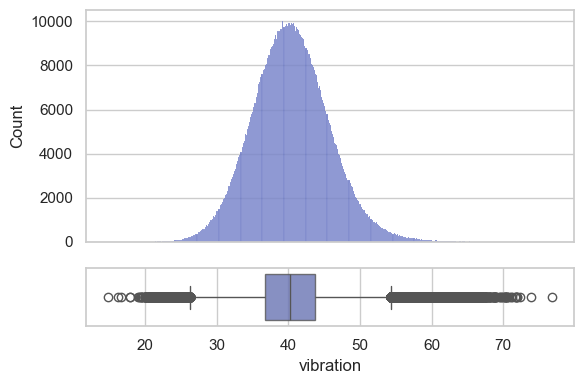

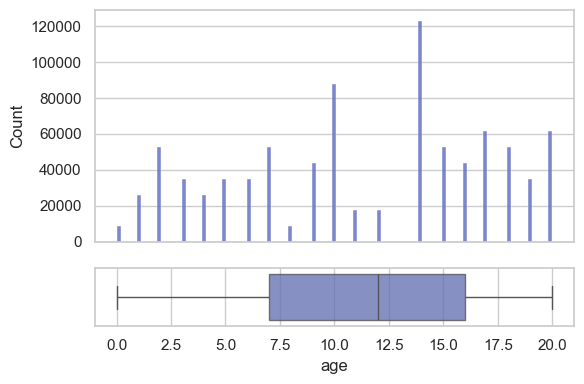

In [36]:
# histograms and boxplots of numerical features
num_cols = df_maintenance.select_dtypes("float").columns
for c in num_cols:
  gridspec = {'height_ratios':[0.8,0.2]}
  fig, axes = plt.subplots(nrows=2, figsize=(6,4),
                           sharex=True, gridspec_kw=gridspec)
  sns.histplot(data=df_maintenance, x=c, color="#5C6BC0", alpha=0.8, ax=axes[0])
  sns.boxplot(data=df_maintenance, x=c, color="#5C6BC0", boxprops=dict(alpha=0.8),
              ax=axes[1])
  axes[0].grid(axis="x")
  fig.tight_layout()
  plt.show()

<Axes: xlabel='model', ylabel='failure'>

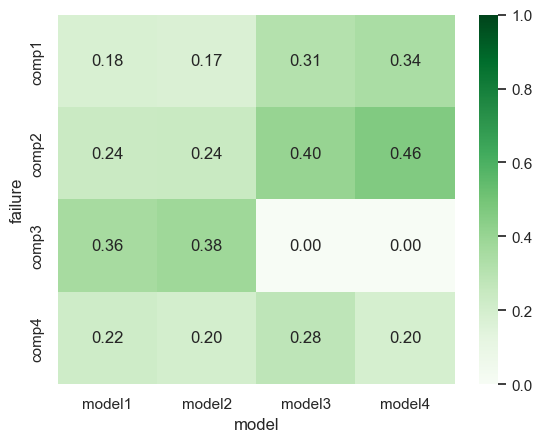

In [37]:
# correlation between the failure and the model features
contingency_table = pd.crosstab(df_maintenance["failure"], df_maintenance["model"], normalize="columns")
sns.heatmap(contingency_table, vmin=0, vmax=1, annot=True, fmt=".2f", cmap="Greens")

We see that the components that cause the most failures are:
- the component 3 for the machine models 1 and 2
- the component 2 for the machine models 3 and 4